<a href="https://colab.research.google.com/github/kvsimonn/CaseLab/blob/main/HW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon- Movies and Films
[Ссылка на датасет](https://www.kaggle.com/datasets/muhammadawaistayyab/amazon-movies-and-films)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
label_encoder = LabelEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv(
    '/content/data.csv',
     delimiter=',')
df = df.iloc[:, 1:]

type(df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.csv'

In [ ]:
df.head(n=10) #Вывод датасета

,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN
3,Kelce,5.0,570,Prime Video,2023.0,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN
5,Those Who Wish Me Dead,4.3,7403,Prime Video,2021.0,R,Taylor Sheridan,"Angelina Jolie,Nicholas Hoult,Jon Bernthal",3.79
6,Renfield,4.1,9259,Prime Video,2023.0,R,Chris McKay,"Nicholas Hoult,Nicolas Cage,Awkwafina",5.99
7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",NaN
8,Black Adam,4.2,22762,Prime Video,2022.0,PG-13,Jaume Collet-Serra,"Dwayne Johnson,Aldis Hodge,Pierce Brosnan",3.79
9,A Thousand and One,4.5,1317,Prime Video,2023.0,R,A.V. Rockwell,"Teyana Taylor,Will Catlett,Josiah Cross,Aven C...",5.89


In [ ]:
len(df['Directed_By'].unique())

1378

In [ ]:
df.info() #Вывести общую информацию о датасете, ознакомиться с датасетом

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2108 non-null   object 
 1   Movie_Rating   2108 non-null   float64
 2   No_of_Ratings  2108 non-null   int64  
 3   Format         2108 non-null   object 
 4   ReleaseYear    2069 non-null   float64
 5   MPAA_Rating    1378 non-null   object 
 6   Directed_By    2043 non-null   object 
 7   Starring       2107 non-null   object 
 8   Price          1011 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 148.3+ KB


In [ ]:
df.describe() #Построить описательную статистику датасета

,Movie_Rating,No_of_Ratings,ReleaseYear,Price
count,2108.000000,2108.000000,2069.000000,1011.000000
mean,4.484677,8090.982448,2008.199613,4.830465
std,0.255954,16157.475033,14.802774,6.717304
min,4.000000,1.000000,1931.000000,0.890000
25%,4.300000,302.000000,2002.000000,3.590000
50%,4.500000,2042.500000,2013.000000,3.790000
75%,4.700000,7717.000000,2019.000000,3.990000
max,5.000000,142807.000000,2023.000000,119.990000


In [ ]:
df.isnull().sum() #Пропуски

title               0
Movie_Rating        0
No_of_Ratings       0
Format              0
ReleaseYear        39
MPAA_Rating       730
Directed_By        65
Starring            1
Price            1097
dtype: int64

In [ ]:
df= df.fillna(df.mean()) #Заполнение пропусков
df=df.fillna('Unknown')

<ipython-input-68-34e6da619d2d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df= df.fillna(df.mean()) #Заполнение пропусков


In [ ]:
df.head(n=10)

,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",4.830465
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.990000
2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",4.830465
3,Kelce,5.0,570,Prime Video,2023.0,Unknown,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",4.830465
4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",4.830465
5,Those Who Wish Me Dead,4.3,7403,Prime Video,2021.0,R,Taylor Sheridan,"Angelina Jolie,Nicholas Hoult,Jon Bernthal",3.790000
6,Renfield,4.1,9259,Prime Video,2023.0,R,Chris McKay,"Nicholas Hoult,Nicolas Cage,Awkwafina",5.990000
7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",4.830465
8,Black Adam,4.2,22762,Prime Video,2022.0,PG-13,Jaume Collet-Serra,"Dwayne Johnson,Aldis Hodge,Pierce Brosnan",3.790000
9,A Thousand and One,4.5,1317,Prime Video,2023.0,R,A.V. Rockwell,"Teyana Taylor,Will Catlett,Josiah Cross,Aven C...",5.890000


In [ ]:
df.isnull().sum() #Отсутствие пропусков

title            0
Movie_Rating     0
No_of_Ratings    0
Format           0
ReleaseYear      0
MPAA_Rating      0
Directed_By      0
Starring         0
Price            0
dtype: int64

In [ ]:
non_informative_features =['Directed_By','Starring'] #Удаление неинформативных признаков
df_n=df.drop(columns=non_informative_features)

In [ ]:
df_n.head(n=10)

,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Price
0,Totally Killer,4.3,323,Prime Video,2023.0,R,4.830465
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,5.990000
2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,4.830465
3,Kelce,5.0,570,Prime Video,2023.0,Unknown,4.830465
4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,4.830465
5,Those Who Wish Me Dead,4.3,7403,Prime Video,2021.0,R,3.790000
6,Renfield,4.1,9259,Prime Video,2023.0,R,5.990000
7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,4.830465
8,Black Adam,4.2,22762,Prime Video,2022.0,PG-13,3.790000
9,A Thousand and One,4.5,1317,Prime Video,2023.0,R,5.890000


In [ ]:
df_n['title'] = label_encoder.fit_transform(df_n['title']) #Преобразуйте признаки с множественными значениями (если они присутствуют) в другие признаки
                                                            #Преобразуйте все нечисловые признаки в числовые
df_n['Format']=label_encoder.fit_transform(df_n['Format']) #LabelEncoder — служебный класс, помогающий нормализовать метки таким образом, чтобы они содержали только значения от 0 до n_classes-1.

In [ ]:
df_n.head(n=20)

,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Price
0,1725,4.3,323,3,2023.0,R,4.830465
1,554,4.7,13268,3,2023.0,R,5.990000
2,35,4.9,1126,3,2023.0,PG,4.830465
3,745,5.0,570,3,2023.0,Unknown,4.830465
4,386,4.8,31813,3,2017.0,PG,4.830465
5,1704,4.3,7403,3,2021.0,R,3.790000
6,1095,4.1,9259,3,2023.0,R,5.990000
7,1600,4.8,52086,3,2009.0,PG-13,4.830465
8,193,4.2,22762,3,2022.0,PG-13,3.790000
9,51,4.5,1317,3,2023.0,R,5.890000


In [ ]:
df_n.to_csv('data_preprocessed_first.csv',sep=',',index=False) #Сохраните предобработанный датасет

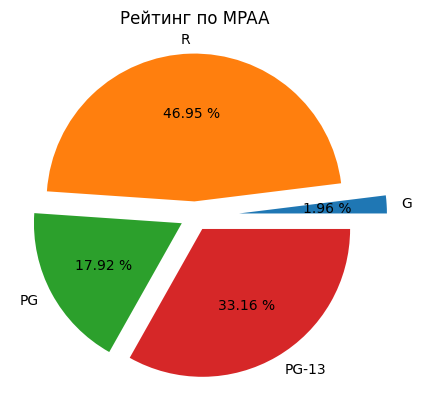

In [ ]:
g = df.loc[df['MPAA_Rating'] == 'G'].count()[0]
r = df.loc[df['MPAA_Rating'] == 'R'].count()[0]
pg = df.loc[df['MPAA_Rating'] == 'PG'].count()[0]
pgt= df.loc[df['MPAA_Rating'] == 'PG-13'].count()[0]
label = ['G','R','PG','PG-13']
plt.title("Рейтинг по MPAA")

explode = (.3,.1,.1,.1)

plt.pie([g,r,pg,pgt],labels=label,autopct='%.2f %%',explode=explode)

plt.show()

График показывает рейтинг фильмов по MPAA.
Фильм из категории R больше

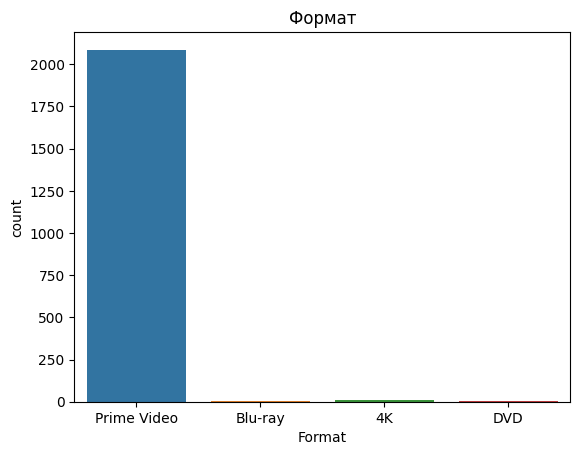

In [ ]:
sns.countplot(data=df, x='Format')
plt.title('Формат')
plt.xlabel('Format')

plt.show()

График показывает количество фильмов в форматах
Больше всего фильмов в формате Prime Video

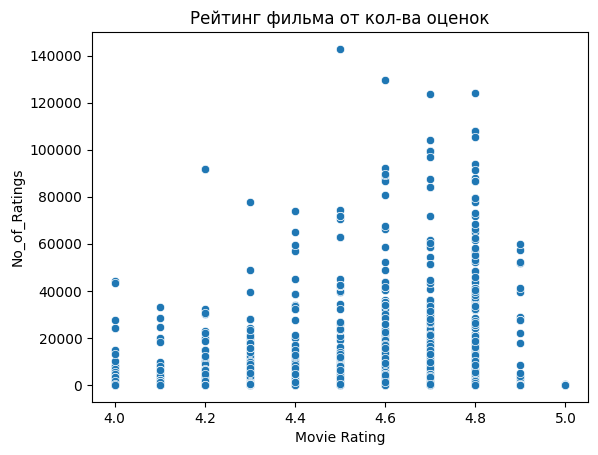

In [ ]:
sns.scatterplot(data=df, x='Movie_Rating', y='No_of_Ratings')
plt.title('Рейтинг фильма от кол-ва оценок')
plt.xlabel('Movie Rating')
plt.show()

График показывающий зависимость рейтинга фильмов от количества оценок.
У фильмов с более низким рейтингом меньше просмотров и оценок